In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import scipy as sp
from test import *
%matplotlib inline
df = pd.read_csv('Data/benchmark1.csv')

Correlation between Last5AveragePlayerAST and PlayerAST (0.71257957840904318, 0.0)


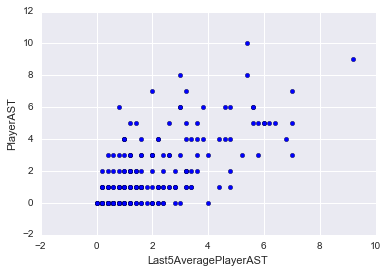

Correlation between Last10AveragePlayerAST and PlayerAST (0.72720842124304064, 0.0)


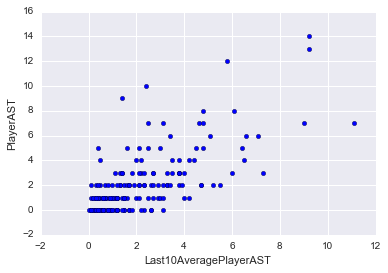

Correlation between Last20AveragePlayerAST and PlayerAST (0.72900041739570098, 0.0)


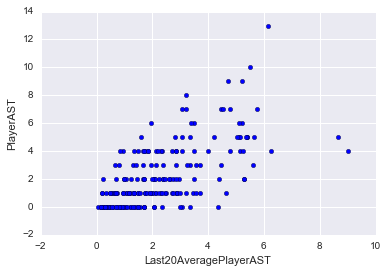

Correlation between Last5AveragePlayerBLK and PlayerBLK (0.47927644815277837, 0.0)


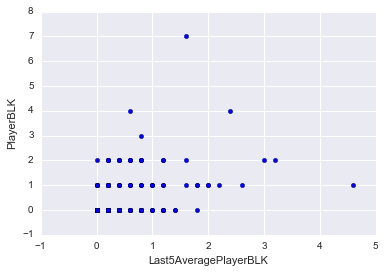

Correlation between Last10AveragePlayerBLK and PlayerBLK (0.51285849706747655, 0.0)


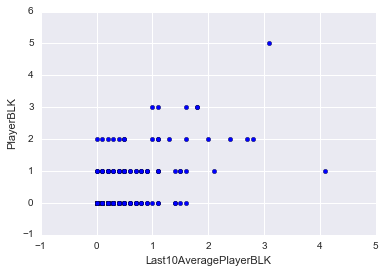

Correlation between Last20AveragePlayerBLK and PlayerBLK (0.53016431145842402, 0.0)


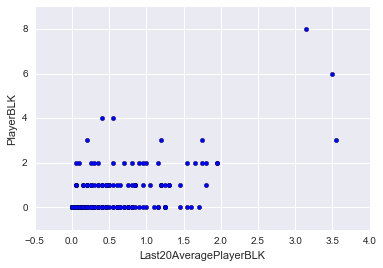

Correlation between Last5AveragePlayerPTS and PlayerPTS (0.69315500704312294, 0.0)


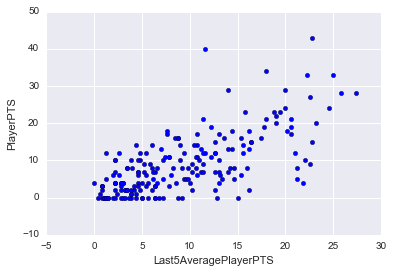

Correlation between Last10AveragePlayerPTS and PlayerPTS (0.70583665659698902, 0.0)


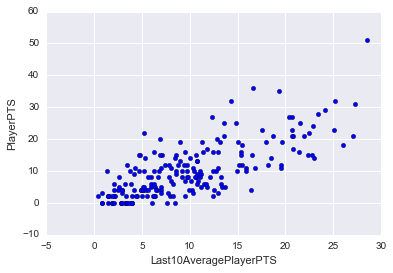

Correlation between Last20AveragePlayerPTS and PlayerPTS (0.70452109113086447, 0.0)


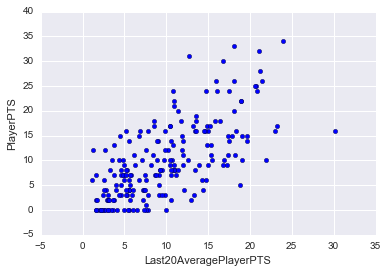

Correlation between Last5AveragePlayerORB and PlayerORB (0.5043545550812315, 0.0)


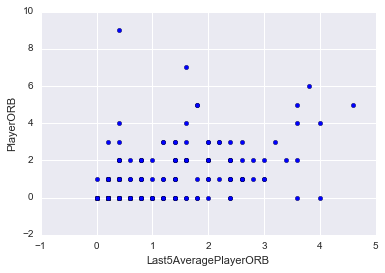

Correlation between Last10AveragePlayerORB and PlayerORB (0.5334529728484787, 0.0)


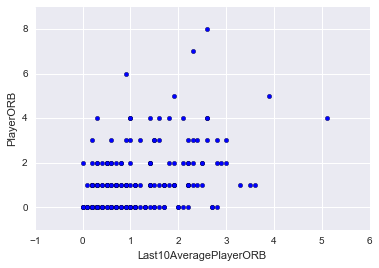

Correlation between Last20AveragePlayerORB and PlayerORB (0.54723317183857823, 0.0)


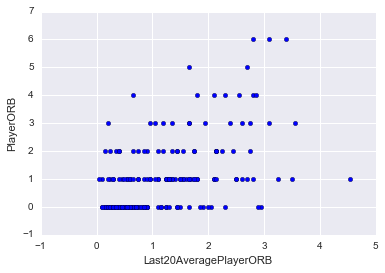

In [8]:
# Display plots for all player averages
for key, value in player_rolling_mean_stat_dict.iteritems():
    for window in value:
        # Select columns of interest and remove any NaN
        df2 = df[['Last' + str(window) + 'Average' + key, key]]
        df2 = df2[np.isfinite(df2.iloc[:,0])]

        # Find linear correlation 
        print "Correlation between " + 'Last' + str(window) + 'Average' + key + \
              " and " + key, sp.stats.pearsonr(df2.iloc[:,0], df2.iloc[:,1])

        # Scatter a random selection of points
        random_indices = np.random.randint(0,len(df2),200)
        plt.scatter(df2.iloc[random_indices,0], df2.iloc[random_indices,1])
        plt.xlabel(df2.columns.values[0])
        plt.ylabel(df2.columns.values[1])
        plt.show()

Correlation between Last5AverageOppAllowedAST and PlayerAST (0.041389944776100751, 1.0523408233362095e-144)


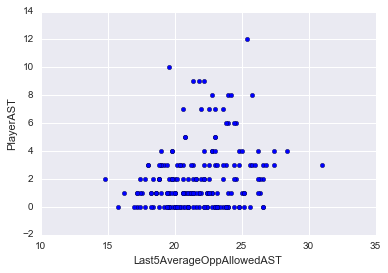

Correlation between Last10AverageOppAllowedAST and PlayerAST (0.047601859707735825, 7.2716488069874059e-190)


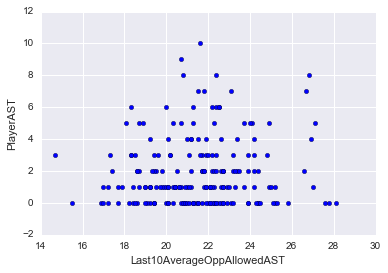

Correlation between Last20AverageOppAllowedAST and PlayerAST (0.050960942058307659, 3.216004629280165e-215)


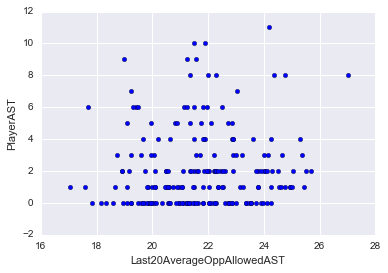

Correlation between Last5AverageOppAllowedTRB and PlayerTRB (0.02814253250189418, 6.6667386446718246e-68)


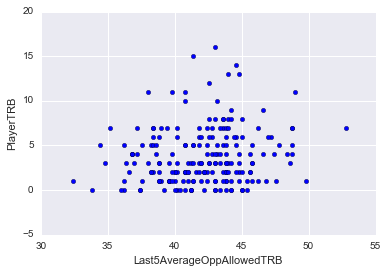

Correlation between Last10AverageOppAllowedTRB and PlayerTRB (0.033087195180496312, 1.0489811667573593e-92)


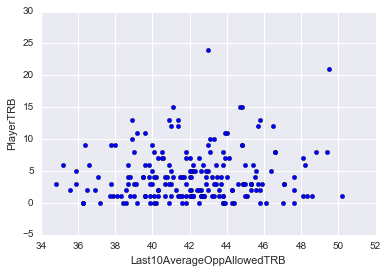

Correlation between Last20AverageOppAllowedTRB and PlayerTRB (0.038032386249887598, 1.0538365898122358e-120)


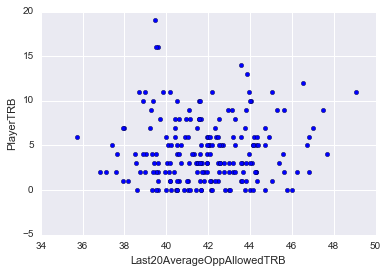

Correlation between Last5AverageOppAllowedBLK and PlayerBLK (0.036909413657495477, 1.8514873041048429e-115)


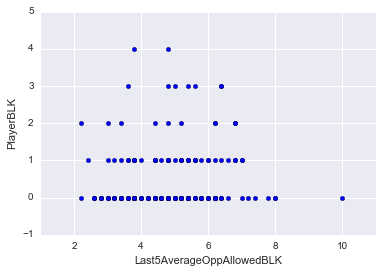

Correlation between Last10AverageOppAllowedBLK and PlayerBLK (0.04631837612536413, 7.2910762619240226e-180)


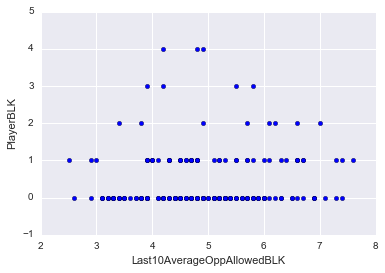

Correlation between Last20AverageOppAllowedBLK and PlayerBLK (0.053498720826809211, 5.2848582136930706e-237)


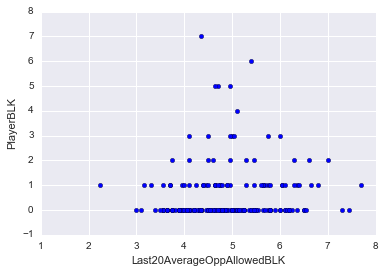

Correlation between Last5AverageOppAllowedSTL and PlayerSTL (0.026334545462358784, 1.1035066801936191e-59)


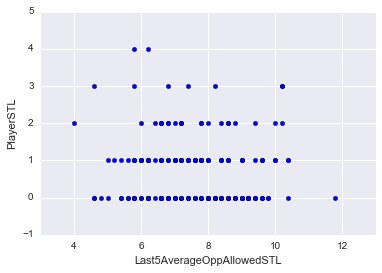

Correlation between Last10AverageOppAllowedSTL and PlayerSTL (0.034778138515269709, 3.159554940190558e-102)


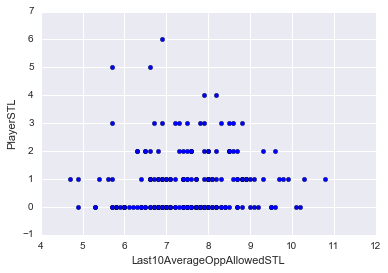

Correlation between Last20AverageOppAllowedSTL and PlayerSTL (0.042455450737212887, 6.0418659215253981e-150)


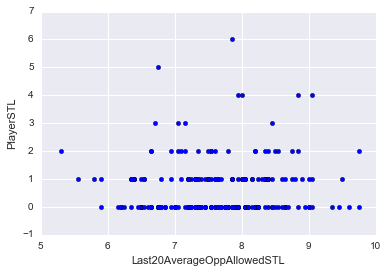

Correlation between Last5AverageOppForcedTOV and PlayerTOV (0.048573251873379596, 1.3991502327851866e-198)


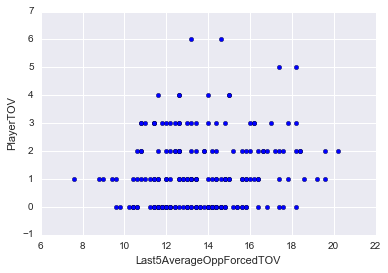

Correlation between Last10AverageOppForcedTOV and PlayerTOV (0.053988131323243149, 1.0548714575171836e-243)


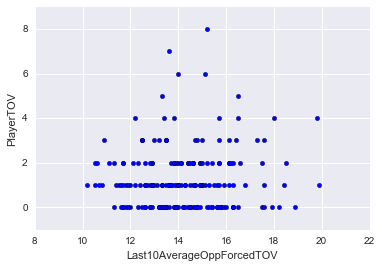

Correlation between Last20AverageOppForcedTOV and PlayerTOV (0.058823250734402741, 3.6501283211607766e-286)


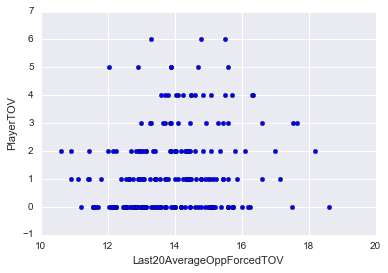

Correlation between Last5AverageOppAllowedPTSPerPossession and PlayerPTS (0.027348306498311308, 3.1708668390321282e-64)


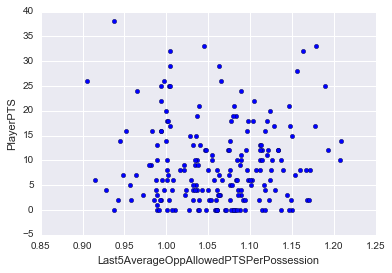

Correlation between Last10AverageOppAllowedPTSPerPossession and PlayerPTS (0.032562702415527826, 7.5480148961064262e-90)


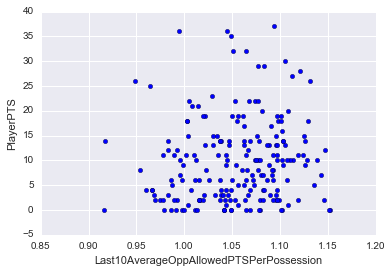

Correlation between Last20AverageOppAllowedPTSPerPossession and PlayerPTS (0.034892219180387644, 6.8123367002119629e-102)


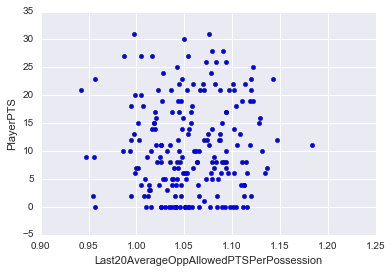

Correlation between Last5AverageOppAllowedPTS and PlayerPTS (0.036507018748854161, 5.3745175733707861e-113)


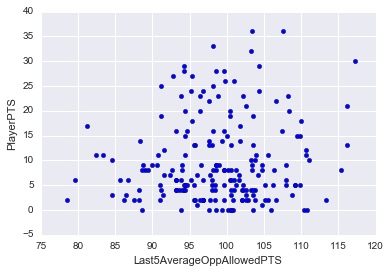

Correlation between Last10AverageOppAllowedPTS and PlayerPTS (0.041181298943164371, 1.4176525333516066e-142)


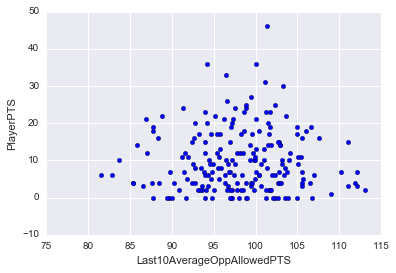

Correlation between Last20AverageOppAllowedPTS and PlayerPTS (0.042503515431164651, 2.7909468417541465e-150)


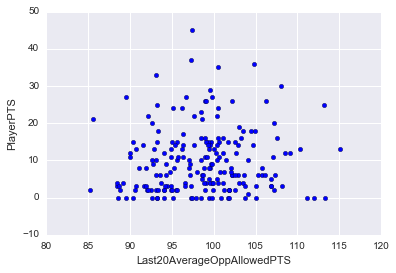

In [22]:
# Display plots for all player averages
for key, value in opponent_rolling_mean_stat_dict.iteritems():
    for window in value:
        # Select our x and y values
        y = 'Player' + key[-3:]
        x = 'Last' + str(window) + 'Average' + key
        if len(key) > 14:
            y = 'Player' + key[10:13]
            
        # Select columns of interest and remove any NaN
        df2 = df[[x, y]]
        df2 = df2[np.isfinite(df2.iloc[:,0])]

        # Find linear correlation 
        print "Correlation between " + 'Last' + str(window) + 'Average' + key + \
              " and " + y, sp.stats.pearsonr(df2.iloc[:,0], df2.iloc[:,1])

        # Scatter a random selection of 200 points
        random_indices = np.random.randint(0,len(df2),200)
        plt.scatter(df2.iloc[random_indices,0], df2.iloc[random_indices,1])
        plt.xlabel(df2.columns.values[0])
        plt.ylabel(df2.columns.values[1])
        plt.show()